In [67]:
import pandas as pd
import numpy as np
import scattertext as st
import spacy
from pprint import pprint
import matplotlib
import seaborn as sns
%matplotlib inline
 

In [68]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [69]:
#importing data
data=pd.read_csv('Initial_Data_pulls/Mela_Keywords.csv', nrows=2563)
data.head(10)

,Unnamed: 0,Keyword,Device Category,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue
0,0,dynamic search ads,mobile,"17,092","$5,346.38",$0.31,"21,874",40.04%,4.36,0.99%,216,"$36,398.64"
1,1,dynamic search ads,desktop,"11,688","$5,590.69",$0.48,"13,326",25.37%,6.78,2.61%,348,"$60,660.93"
2,2,mela bags,mobile,"10,481","$3,361.18",$0.32,"14,592",31.89%,4.99,1.01%,148,"$25,512.35"
3,3,mela bags,desktop,"8,760","$2,991.68",$0.34,"10,502",15.07%,8.21,3.15%,331,"$59,409.14"
4,4,melabags,mobile,"5,459",$966.20,$0.18,"7,933",35.30%,4.99,0.86%,68,"$14,337.29"
5,5,+mela +purses,mobile,"5,275","$1,748.55",$0.33,"6,449",48.94%,3.63,0.62%,40,"$8,724.47"
6,6,+mela +wallets,mobile,"5,104","$1,683.94",$0.33,"6,838",35.00%,3.99,1.40%,96,"$12,827.41"
7,7,melabags,desktop,"4,079","$1,113.29",$0.27,"4,924",17.08%,7.67,2.66%,131,"$26,841.46"
8,8,dynamic search ads,tablet,"3,871","$1,534.75",$0.40,"5,003",32.50%,6.29,1.20%,60,"$11,572.25"
9,9,+mela wallet purse,mobile,"3,476",$944.03,$0.27,"4,751",32.31%,4.68,1.12%,53,"$6,820.93"


In [70]:
data.tail(10)

,Unnamed: 0,Keyword,Device Category,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue
2553,2553,zip top tote bag,desktop,1,$0.55,$0.55,1,0.00%,2.00,0.00%,0,$0.00
2554,2554,zip top tote bag,mobile,1,$1.12,$1.12,1,100.00%,1.00,0.00%,0,$0.00
2555,2555,(not provided),desktop,0,$0.00,$0.00,11,45.45%,4.09,0.00%,0,$0.00
2556,2556,(not provided),mobile,0,$0.00,$0.00,15,26.67%,3.47,0.00%,0,$0.00
2557,2557,(not set),desktop,0,$0.00,$0.00,182,42.86%,5.98,2.20%,4,$825.27
2558,2558,(not set),mobile,0,$0.00,$0.00,155,52.90%,4.09,0.00%,0,$0.00
2559,2559,(not set),tablet,0,$0.00,$0.00,22,50.00%,3.32,0.00%,0,$0.00
2560,2560,mela international patti,tablet,0,$0.00,$0.00,1,0.00%,5.00,0.00%,0,$0.00
2561,2561,organizer crossbody,tablet,0,$0.00,$0.00,1,100.00%,1.00,0.00%,0,$0.00
2562,2562,red leather purse,desktop,0,$0.00,$0.00,1,100.00%,1.00,0.00%,0,$0.00


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2563 entries, 0 to 2562
Data columns (total 12 columns):
Unnamed: 0                   2563 non-null int64
Keyword                      2563 non-null object
Device Category              2563 non-null object
Clicks                       2563 non-null object
Cost                         2563 non-null object
CPC                          2563 non-null object
Sessions                     2563 non-null object
Bounce Rate                  2563 non-null object
Pages / Session              2563 non-null float64
Ecommerce Conversion Rate    2563 non-null object
Transactions                 2563 non-null int64
Revenue                      2563 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 240.4+ KB


In [72]:
#Taking commas out of the clicks category & Sessions
data['Clicks']=data['Clicks'].str.replace(',', '')
data['Sessions']=data['Sessions'].str.replace(',','')

#taking $ and commas out of cost, CPC, and revenue
data['Cost']=data['Cost'].str.replace('$', '')
data['Cost']=data['Cost'].str.replace(',', '')
data['CPC']=data['CPC'].str.replace('$', '')
data['CPC']=data['CPC'].str.replace(',', '')
data['Revenue']=data['Revenue'].str.replace('$', '')
data['Revenue']=data['Revenue'].str.replace(',', '')

#taking % sign out of bounce rate and ecommerce conversion rate
data['Bounce Rate']=data['Bounce Rate'].str.replace('%', '')
data['Ecommerce Conversion Rate']=data['Ecommerce Conversion Rate'].str.replace('%', '')
data.head(10)

,Unnamed: 0,Keyword,Device Category,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue
0,0,dynamic search ads,mobile,17092,5346.38,0.31,21874,40.04,4.36,0.99,216,36398.64
1,1,dynamic search ads,desktop,11688,5590.69,0.48,13326,25.37,6.78,2.61,348,60660.93
2,2,mela bags,mobile,10481,3361.18,0.32,14592,31.89,4.99,1.01,148,25512.35
3,3,mela bags,desktop,8760,2991.68,0.34,10502,15.07,8.21,3.15,331,59409.14
4,4,melabags,mobile,5459,966.20,0.18,7933,35.30,4.99,0.86,68,14337.29
5,5,+mela +purses,mobile,5275,1748.55,0.33,6449,48.94,3.63,0.62,40,8724.47
6,6,+mela +wallets,mobile,5104,1683.94,0.33,6838,35.00,3.99,1.40,96,12827.41
7,7,melabags,desktop,4079,1113.29,0.27,4924,17.08,7.67,2.66,131,26841.46
8,8,dynamic search ads,tablet,3871,1534.75,0.40,5003,32.50,6.29,1.20,60,11572.25
9,9,+mela wallet purse,mobile,3476,944.03,0.27,4751,32.31,4.68,1.12,53,6820.93


In [73]:
#changing clicks, sessions, pages/session, & transactions to float
data['Clicks']=data.Clicks.astype(float)
data['Sessions']=data.Sessions.astype(float)
data['Pages / Session']=data['Pages / Session'].astype(float)
data['Transactions']=data.Transactions.astype(float)
data['Cost']=data.Cost.astype(float)
data['CPC']=data.CPC.astype(float)
data['Bounce Rate']=data['Bounce Rate'].astype(float)
data['Ecommerce Conversion Rate']=data['Ecommerce Conversion Rate'].astype(float)
data['Revenue']=data.Revenue.astype(float)

In [74]:
#computing cost per revenue
data['Cost/Revenue']=data.Cost / data.Revenue

#computing ROI
data['ROI']= (data.Revenue-data.Cost)/data.Cost

#computing sessions per cost
data["Sessions/Cost"]=data.Sessions/data.Cost

In [75]:
#categorizing Bounce rate
bins=[0, 25, 40, 55, 70, 100]
group_names=['very excellent', 'excellent', 'average','higher than average','high']


In [76]:
Bounce_Rate_Category=pd.cut(data["Bounce Rate"], bins, labels=group_names)
data["Bounce Rate Category"]=pd.cut(data["Bounce Rate"], bins, labels=group_names)
data

,Unnamed: 0,Keyword,Device Category,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue,Cost/Revenue,ROI,Sessions/Cost,Bounce Rate Category
0,0,dynamic search ads,mobile,17092.0,5346.38,0.31,21874.0,40.04,4.36,0.99,216.0,36398.64,0.146884,5.808091,4.091366,average
1,1,dynamic search ads,desktop,11688.0,5590.69,0.48,13326.0,25.37,6.78,2.61,348.0,60660.93,0.092163,9.850348,2.383606,excellent
2,2,mela bags,mobile,10481.0,3361.18,0.32,14592.0,31.89,4.99,1.01,148.0,25512.35,0.131747,6.590296,4.341333,excellent
3,3,mela bags,desktop,8760.0,2991.68,0.34,10502.0,15.07,8.21,3.15,331.0,59409.14,0.050357,18.858120,3.510402,very excellent
4,4,melabags,mobile,5459.0,966.20,0.18,7933.0,35.30,4.99,0.86,68.0,14337.29,0.067391,13.838843,8.210515,excellent
5,5,+mela +purses,mobile,5275.0,1748.55,0.33,6449.0,48.94,3.63,0.62,40.0,8724.47,0.200419,3.989546,3.688199,average
6,6,+mela +wallets,mobile,5104.0,1683.94,0.33,6838.0,35.00,3.99,1.40,96.0,12827.41,0.131277,6.617498,4.060715,excellent
7,7,melabags,desktop,4079.0,1113.29,0.27,4924.0,17.08,7.67,2.66,131.0,26841.46,0.041477,23.110034,4.422927,very excellent
8,8,dynamic search ads,tablet,3871.0,1534.75,0.40,5003.0,32.50,6.29,1.20,60.0,11572.25,0.132623,6.540153,3.259814,excellent
9,9,+mela wallet purse,mobile,3476.0,944.03,0.27,4751.0,32.31,4.68,1.12,53.0,6820.93,0.138402,6.225332,5.032679,excellent


In [77]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2563 entries, 0 to 2562
Data columns (total 16 columns):
Unnamed: 0                   2563 non-null int64
Keyword                      2563 non-null object
Device Category              2563 non-null object
Clicks                       2563 non-null float64
Cost                         2563 non-null float64
CPC                          2563 non-null float64
Sessions                     2563 non-null float64
Bounce Rate                  2563 non-null float64
Pages / Session              2563 non-null float64
Ecommerce Conversion Rate    2563 non-null float64
Transactions                 2563 non-null float64
Revenue                      2563 non-null float64
Cost/Revenue                 2556 non-null float64
ROI                          2556 non-null float64
Sessions/Cost                2563 non-null float64
Bounce Rate Category         2116 non-null category
dtypes: category(1), float64(12), int64(1), object(2)
memory usage: 303.1+ KB


,Unnamed: 0,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue,Cost/Revenue,ROI,Sessions/Cost
count,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2556.000000,2556.000000,2563.000000
mean,1281.000000,78.018338,34.692392,0.584951,96.549356,50.391190,3.434858,0.740304,1.435037,243.391420,inf,inf,inf
std,740.018693,571.773039,217.812148,0.452144,726.592241,34.377009,3.125392,5.096292,12.615956,2207.517201,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,640.500000,1.000000,0.745000,0.280000,2.000000,24.875000,1.330000,0.000000,0.000000,0.000000,inf,-1.000000,1.355662
50%,1281.000000,4.000000,2.170000,0.440000,5.000000,50.000000,2.500000,0.000000,0.000000,0.000000,inf,-1.000000,2.500000
75%,1921.500000,17.000000,8.600000,0.750000,19.000000,77.340000,4.500000,0.000000,0.000000,0.000000,inf,-1.000000,3.960396
max,2562.000000,17092.000000,5590.690000,3.930000,21874.000000,100.000000,43.000000,100.000000,348.000000,60660.930000,inf,inf,inf


In [78]:
data.sort_values(by='Clicks', ascending=False).head(10)

,Unnamed: 0,Keyword,Device Category,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue,Cost/Revenue,ROI,Sessions/Cost,Bounce Rate Category
0,0,dynamic search ads,mobile,17092.0,5346.38,0.31,21874.0,40.04,4.36,0.99,216.0,36398.64,0.146884,5.808091,4.091366,average
1,1,dynamic search ads,desktop,11688.0,5590.69,0.48,13326.0,25.37,6.78,2.61,348.0,60660.93,0.092163,9.850348,2.383606,excellent
2,2,mela bags,mobile,10481.0,3361.18,0.32,14592.0,31.89,4.99,1.01,148.0,25512.35,0.131747,6.590296,4.341333,excellent
3,3,mela bags,desktop,8760.0,2991.68,0.34,10502.0,15.07,8.21,3.15,331.0,59409.14,0.050357,18.858120,3.510402,very excellent
4,4,melabags,mobile,5459.0,966.20,0.18,7933.0,35.30,4.99,0.86,68.0,14337.29,0.067391,13.838843,8.210515,excellent
5,5,+mela +purses,mobile,5275.0,1748.55,0.33,6449.0,48.94,3.63,0.62,40.0,8724.47,0.200419,3.989546,3.688199,average
6,6,+mela +wallets,mobile,5104.0,1683.94,0.33,6838.0,35.00,3.99,1.40,96.0,12827.41,0.131277,6.617498,4.060715,excellent
7,7,melabags,desktop,4079.0,1113.29,0.27,4924.0,17.08,7.67,2.66,131.0,26841.46,0.041477,23.110034,4.422927,very excellent
8,8,dynamic search ads,tablet,3871.0,1534.75,0.40,5003.0,32.50,6.29,1.20,60.0,11572.25,0.132623,6.540153,3.259814,excellent
9,9,+mela wallet purse,mobile,3476.0,944.03,0.27,4751.0,32.31,4.68,1.12,53.0,6820.93,0.138402,6.225332,5.032679,excellent


In [79]:
#dataframe with any clicks less than 10 removed- don't have enough data to determine if these are good keywords or not
few_data=data[data.Clicks>10]
few_data.describe()

,Unnamed: 0,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue,Cost/Revenue,ROI,Sessions/Cost
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,420.500000,231.258907,101.962423,0.534406,286.448931,47.912815,3.929596,0.879489,4.306413,731.376793,inf,3.891291,3.165179
std,243.208758,980.259194,371.173285,0.349009,1246.770244,21.347828,2.122321,1.743762,21.736694,3806.269506,NaN,11.921015,2.389107
min,0.000000,11.000000,0.580000,0.050000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.008305,-1.000000,0.326023
25%,210.250000,18.000000,7.775000,0.290000,20.000000,30.630000,2.200000,0.000000,0.000000,0.000000,0.211808,-1.000000,1.567710
50%,420.500000,38.000000,17.470000,0.435000,43.000000,45.585000,3.590000,0.000000,0.000000,0.000000,inf,-1.000000,2.638031
75%,630.750000,110.000000,57.942500,0.700000,124.000000,65.380000,5.270000,1.265000,1.000000,217.910000,inf,3.721285,4.017883
max,841.000000,17092.000000,5590.690000,2.810000,21874.000000,100.000000,14.260000,15.000000,348.000000,60660.930000,inf,119.404040,27.586207


In [80]:
#dataframe with only keywords that yielded NO revenue
no_rev=data[data.Revenue ==0]
no_rev.describe()

,Unnamed: 0,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue,Cost/Revenue,ROI,Sessions/Cost
count,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.0,2207.0,2207.0,2200.000000,2200.0,2207.000000
mean,1428.869959,11.726778,6.661926,0.597630,12.941097,52.898586,3.075972,0.0,0.0,0.0,inf,-1.0,inf
std,669.434984,26.582551,17.888673,0.470466,28.986009,35.840748,3.017391,0.0,0.0,0.0,NaN,0.0,NaN
min,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,inf,-1.0,0.000000
25%,865.500000,1.000000,0.635000,0.270000,1.000000,25.000000,1.130000,0.0,0.0,0.0,inf,-1.0,1.298701
50%,1447.000000,3.000000,1.620000,0.440000,3.000000,50.000000,2.000000,0.0,0.0,0.0,inf,-1.0,2.439024
75%,2005.500000,10.000000,4.710000,0.770000,11.000000,84.620000,3.955000,0.0,0.0,0.0,inf,-1.0,3.921569
max,2562.000000,305.000000,318.810000,3.930000,310.000000,100.000000,43.000000,0.0,0.0,0.0,inf,-1.0,inf


In [81]:
#dataframe with only keywords that yeilded revenue and had more than 10 clicks
data_rev=data[(data.Revenue != 0) & (data.Clicks >10)]
data_rev.describe()

,Unnamed: 0,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue,Cost/Revenue,ROI,Sessions/Cost
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,231.428115,555.453674,236.698083,0.495687,697.814696,36.481054,5.158530,2.365911,11.584665,1967.473674,0.249840,12.158042,3.440437
std,192.143298,1555.333662,583.674237,0.277871,1978.888267,15.031349,1.893301,2.160613,34.481880,6050.782151,0.371860,16.551073,2.461694
min,0.000000,12.000000,1.980000,0.080000,14.000000,0.000000,1.800000,0.150000,1.000000,48.020000,0.008305,-0.647706,0.661686
25%,78.000000,51.000000,21.440000,0.300000,64.000000,25.000000,3.740000,1.010000,1.000000,172.260000,0.062588,2.541804,1.892022
50%,174.000000,139.000000,67.850000,0.420000,168.000000,34.600000,4.750000,1.820000,2.000000,389.190000,0.126062,6.932587,2.834030
75%,347.000000,410.000000,178.240000,0.590000,495.000000,45.210000,6.600000,2.780000,7.000000,1182.000000,0.282342,14.977597,4.060715
max,789.000000,17092.000000,5590.690000,1.500000,21874.000000,77.670000,14.260000,15.000000,348.000000,60660.930000,2.838542,119.404040,22.809278


In [82]:
#keywords with a negative ROI- not what we are looking for!
data[data.ROI <0]

,Unnamed: 0,Keyword,Device Category,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue,Cost/Revenue,ROI,Sessions/Cost,Bounce Rate Category
54,54,handbags crossbody bags,mobile,605.0,284.38,0.47,645.0,72.25,2.02,0.16,1.0,159.60,1.781830,-0.438779,2.268092,high
65,65,mela wallets sale,mobile,492.0,534.53,1.09,620.0,40.81,3.91,0.65,4.0,389.19,1.373442,-0.271902,1.159897,average
67,67,women's leather wallet designer,mobile,470.0,242.73,0.52,507.0,60.55,2.67,0.39,2.0,148.80,1.631250,-0.386973,2.088741,higher than average
76,76,leather purses,mobile,422.0,166.56,0.39,495.0,69.70,2.52,0.20,1.0,148.00,1.125405,-0.111431,2.971902,higher than average
89,89,leather cross body purses,mobile,360.0,311.60,0.87,322.0,72.36,2.44,0.31,1.0,138.00,2.257971,-0.557125,1.033376,high
96,96,handbags sale,mobile,305.0,245.03,0.80,305.0,53.77,2.37,0.00,0.0,0.00,inf,-1.000000,1.244746,average
99,99,leather crossbody bag,mobile,295.0,212.94,0.72,264.0,72.73,2.03,0.00,0.0,0.00,inf,-1.000000,1.239786,high
101,101,hand bags.com,mobile,283.0,65.75,0.23,307.0,73.29,2.22,0.00,0.0,0.00,inf,-1.000000,4.669202,high
102,102,+cheap mela purses,mobile,282.0,263.93,0.94,412.0,56.80,2.76,0.49,2.0,132.84,1.986826,-0.496685,1.561020,higher than average
106,106,+cheap mela bags,mobile,277.0,218.00,0.79,287.0,60.63,2.37,0.35,1.0,76.80,2.838542,-0.647706,1.316514,higher than average


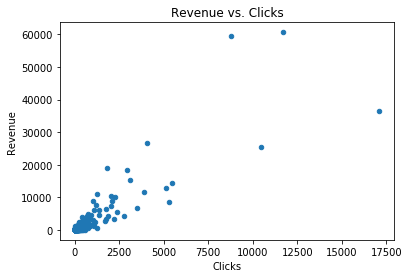

In [83]:
#scatterplots of various variables in th data of keywords with revenue
data_rev.plot.scatter(y="Revenue", x="Clicks", title="Revenue vs. Clicks")

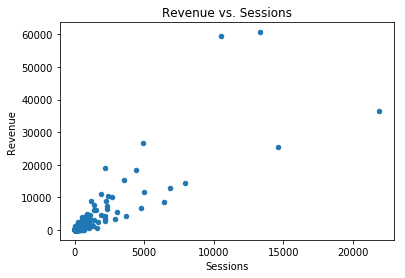

In [84]:
data_rev.plot.scatter(y="Revenue", x="Sessions", title="Revenue vs. Sessions")

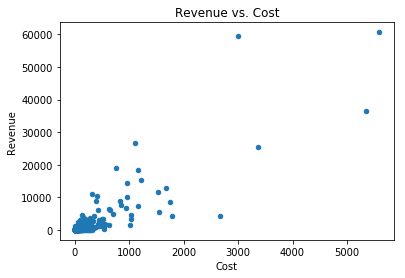

In [85]:
data_rev.plot.scatter(y="Revenue", x="Cost", title="Revenue vs. Cost")

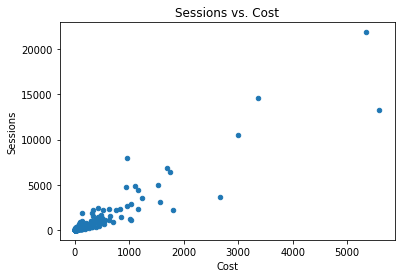

In [86]:
data_rev.plot.scatter(y="Sessions", x="Cost", title="Sessions vs. Cost" )

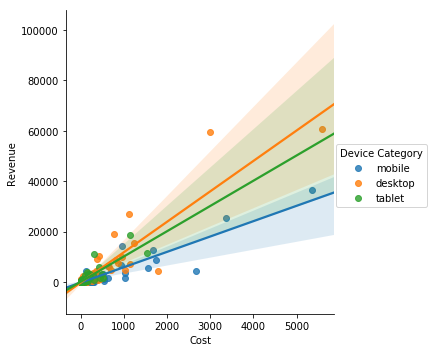

In [87]:
#comparing device category in plots
sns.lmplot(x="Cost", y="Revenue", hue="Device Category", data=data_rev)

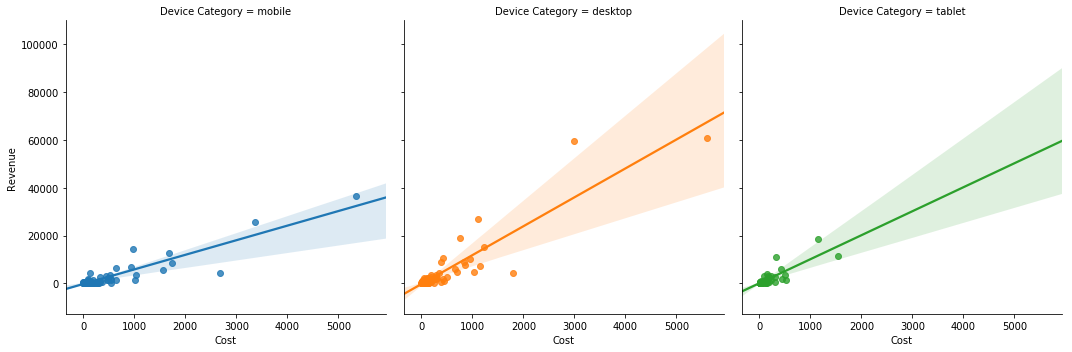

In [88]:
sns.lmplot(x="Cost", y="Revenue", hue="Device Category", col="Device Category", data=data_rev)

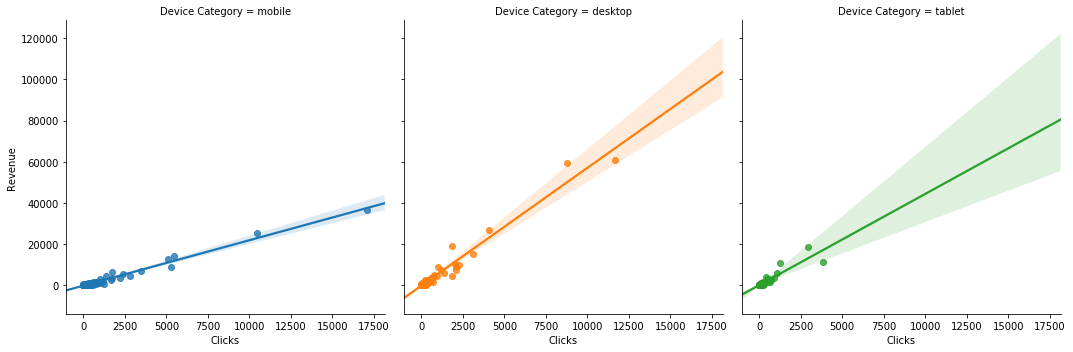

In [89]:
sns.lmplot(x="Clicks", y="Revenue", hue="Device Category", col="Device Category", data=data_rev)

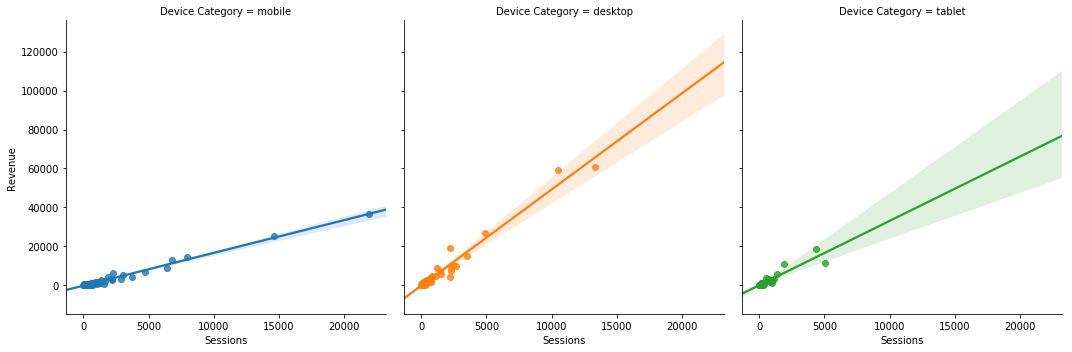

In [90]:
sns.lmplot(x="Sessions", y="Revenue", hue="Device Category", col="Device Category", data=data_rev)

In [91]:
#average values based on device category
by_device_mean=data_rev.groupby('Device Category').mean()
by_device_mean

,Unnamed: 0,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue,Cost/Revenue,ROI,Sessions/Cost
Device Category,,,,,,,,,,,,,
desktop,235.457627,521.830508,254.956949,0.565339,600.559322,29.706271,6.115085,2.901864,16.381356,2822.348729,0.185862,14.110131,2.579335
mobile,204.031496,730.204724,277.005118,0.433543,951.031496,45.311496,3.819843,1.723150,9.196850,1473.569055,0.370282,9.442436,4.267484
tablet,275.602941,287.426471,129.734265,0.490882,393.661765,31.745147,5.998824,2.636324,7.720588,1406.453529,0.135919,13.842390,3.390068


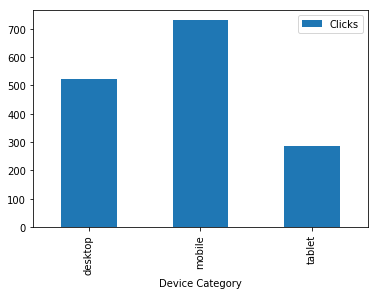

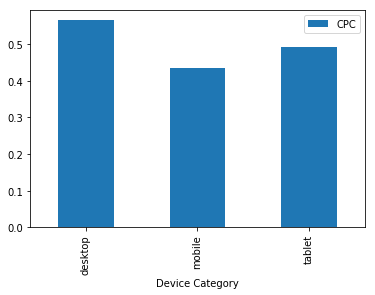

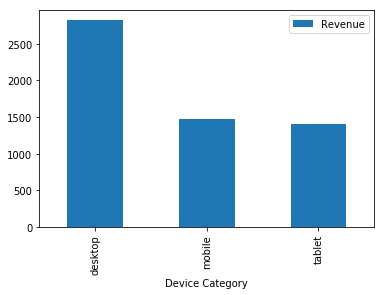

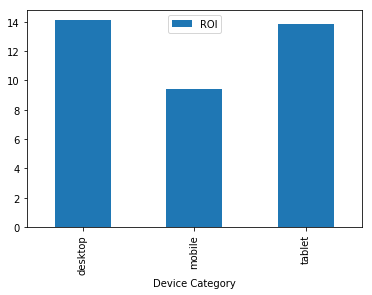

In [92]:
#Bar charts of means differing by device category
by_device_mean.plot.bar(y="Clicks")
by_device_mean.plot.bar(y="CPC")
by_device_mean.plot.bar(y="Revenue")
by_device_mean.plot.bar(y="ROI")

In [93]:
#summing the clicks across keywords -taking into acount all devices
keywords=data_rev.groupby(['Keyword'])[['Clicks']].sum()
#top 20 keywords leading to most clicks
keywords.sort_values(by='Clicks', ascending=False).head(20)

,Clicks
Keyword,
dynamic search ads,32651.0
mela bags,22182.0
melabags,10806.0
+mela +wallets,8900.0
+mela +purses,8605.0
+mela wallet purse,5859.0
mela bags sale,5158.0
mela wallets,5155.0
mela website,4363.0


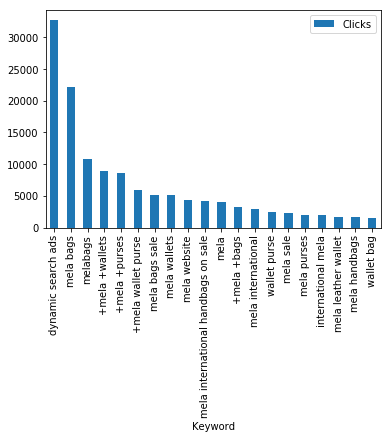

In [94]:
keywords.sort_values(by='Clicks', ascending=False).head(20).plot.bar()

In [95]:
#worst performing keywords in terms of clicks
keywords.sort_values(by='Clicks', ascending=False).tail(20)

,Clicks
Keyword,
ladies clutch wallets,26.0
mela intl,26.0
+purses,25.0
rachel mela,24.0
women's leather wristlets,24.0
mela lauren double frame clutch,22.0
leather mela purses,22.0
+mela +mila wristlet,19.0
women's leather wallets with coin purse,18.0


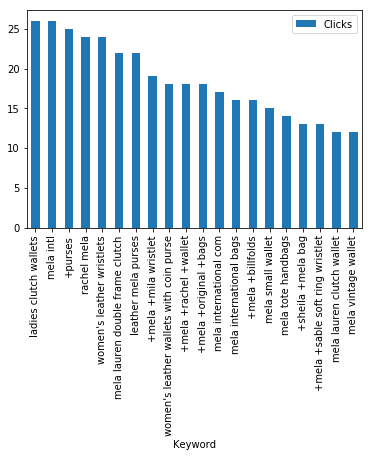

In [96]:
keywords.sort_values(by='Clicks', ascending=False).tail(20).plot.bar()

In [97]:
#summing the clicks across keywords by device type
keyword_device=data_rev.groupby(['Keyword', 'Device Category'])[['Clicks']].sum()
keyword_device.sort_values(by='Clicks', ascending=False).head(20)

Clicks
Keyword                             Device Category         
dynamic search ads                  mobile           17092.0
                                    desktop          11688.0
mela bags                           mobile           10481.0
                                    desktop           8760.0
melabags                            mobile            5459.0
+mela +purses                       mobile            5275.0
+mela +wallets                      mobile            5104.0
melabags                            desktop           4079.0
dynamic search ads                  tablet            3871.0
+mela wallet purse                  mobile            3476.0
+mela +wallets                      desktop           3092.0
mela bags                           tablet            2941.0
mela wallets                        mobile            2792.0
mela international handbags on sale mobile            2404.0
+mela +purses                       desktop           2264.0
mela bags sale                      mobile            2223.0
mela website                        desktop           2106.0
mela bags sale                      desktop           2069.0
mela                                desktop           2054.0
mela wallets                        desktop           1859.0

In [98]:
keyword_device.sort_values(by='Clicks', ascending=False).tail(20)

,,Clicks
Keyword,Device Category,
women's leather wallets with coin purse,mobile,18.0
mela wallet sale,desktop,18.0
+mela +rachel +wallet,mobile,18.0
+mela +original +bags,desktop,18.0
mela lauren wallet wallets,mobile,17.0
+mela +clutch bag,tablet,17.0
mela international com,desktop,17.0
womens wallets mela,tablet,17.0
+mela +billfolds,mobile,16.0


In [99]:
#summing the sessions across keywords -taking into acount all devices
keywords=data_rev.groupby(['Keyword'])[['Sessions']].sum()
#top 20 keywords leading to most sessions
keywords.sort_values(by='Sessions', ascending=False).head(20)

,Sessions
Keyword,
dynamic search ads,40203.0
mela bags,29482.0
melabags,14747.0
+mela +wallets,11319.0
+mela +purses,10507.0
+mela wallet purse,7709.0
mela wallets,6838.0
mela bags sale,6319.0
mela international handbags on sale,5286.0


In [100]:
# 20 worst keywords for sessions
keywords.sort_values(by='Sessions', ascending=True).head(20)

,Sessions
Keyword,
mela lauren clutch wallet,14.0
+sheila +mela bag,17.0
mela international bags,17.0
+mela +billfolds,19.0
mela small wallet,20.0
mela tote handbags,20.0
+mela +sable soft ring wristlet,20.0
+mela +original +bags,20.0
mela international com,22.0
